In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import joblib
#To remove warnings
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler


In [2]:
df = pd.read_csv('Train.csv')

In [3]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-4.464606,-4.679129,3.101546,0.506130,-0.221083,-2.032511,-2.910870,0.050714,-1.522351,3.761892,...,3.059700,-1.690440,2.846296,2.235198,6.667486,0.443809,-2.369169,2.950578,-3.480324,0
1,3.365912,3.653381,0.909671,-1.367528,0.332016,2.358938,0.732600,-4.332135,0.565695,-0.101080,...,-1.795474,3.032780,-2.467514,1.894599,-2.297780,-1.731048,5.908837,-0.386345,0.616242,0
2,-3.831843,-5.824444,0.634031,-2.418815,-1.773827,1.016824,-2.098941,-3.173204,-2.081860,5.392621,...,-0.257101,0.803550,4.086219,2.292138,5.360850,0.351993,2.940021,3.839160,-4.309402,0
3,1.618098,1.888342,7.046143,-1.147285,0.083080,-1.529780,0.207309,-2.493629,0.344926,2.118578,...,-3.584425,-2.577474,1.363769,0.622714,5.550100,-1.526796,0.138853,3.101430,-1.277378,0
4,-0.111440,3.872488,-3.758361,-2.982897,3.792714,0.544960,0.205433,4.848994,-1.854920,-6.220023,...,8.265896,6.629213,-10.068689,1.222987,-3.229763,1.686909,-2.163896,-3.644622,6.510338,0


In [4]:
df.isnull().sum()

V1        18
V2        18
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
V29        0
V30        0
V31        0
V32        0
V33        0
V34        0
V35        0
V36        0
V37        0
V38        0
V39        0
V40        0
Target     0
dtype: int64

In [5]:
df.isna()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

In [8]:
df.drop(['V1'], axis=1, inplace=True)

In [9]:
df.drop(['V2'], axis=1, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V3      20000 non-null  float64
 1   V4      20000 non-null  float64
 2   V5      20000 non-null  float64
 3   V6      20000 non-null  float64
 4   V7      20000 non-null  float64
 5   V8      20000 non-null  float64
 6   V9      20000 non-null  float64
 7   V10     20000 non-null  float64
 8   V11     20000 non-null  float64
 9   V12     20000 non-null  float64
 10  V13     20000 non-null  float64
 11  V14     20000 non-null  float64
 12  V15     20000 non-null  float64
 13  V16     20000 non-null  float64
 14  V17     20000 non-null  float64
 15  V18     20000 non-null  float64
 16  V19     20000 non-null  float64
 17  V20     20000 non-null  float64
 18  V21     20000 non-null  float64
 19  V22     20000 non-null  float64
 20  V23     20000 non-null  float64
 21  V24     20000 non-null  float64
 22

<Axes: >

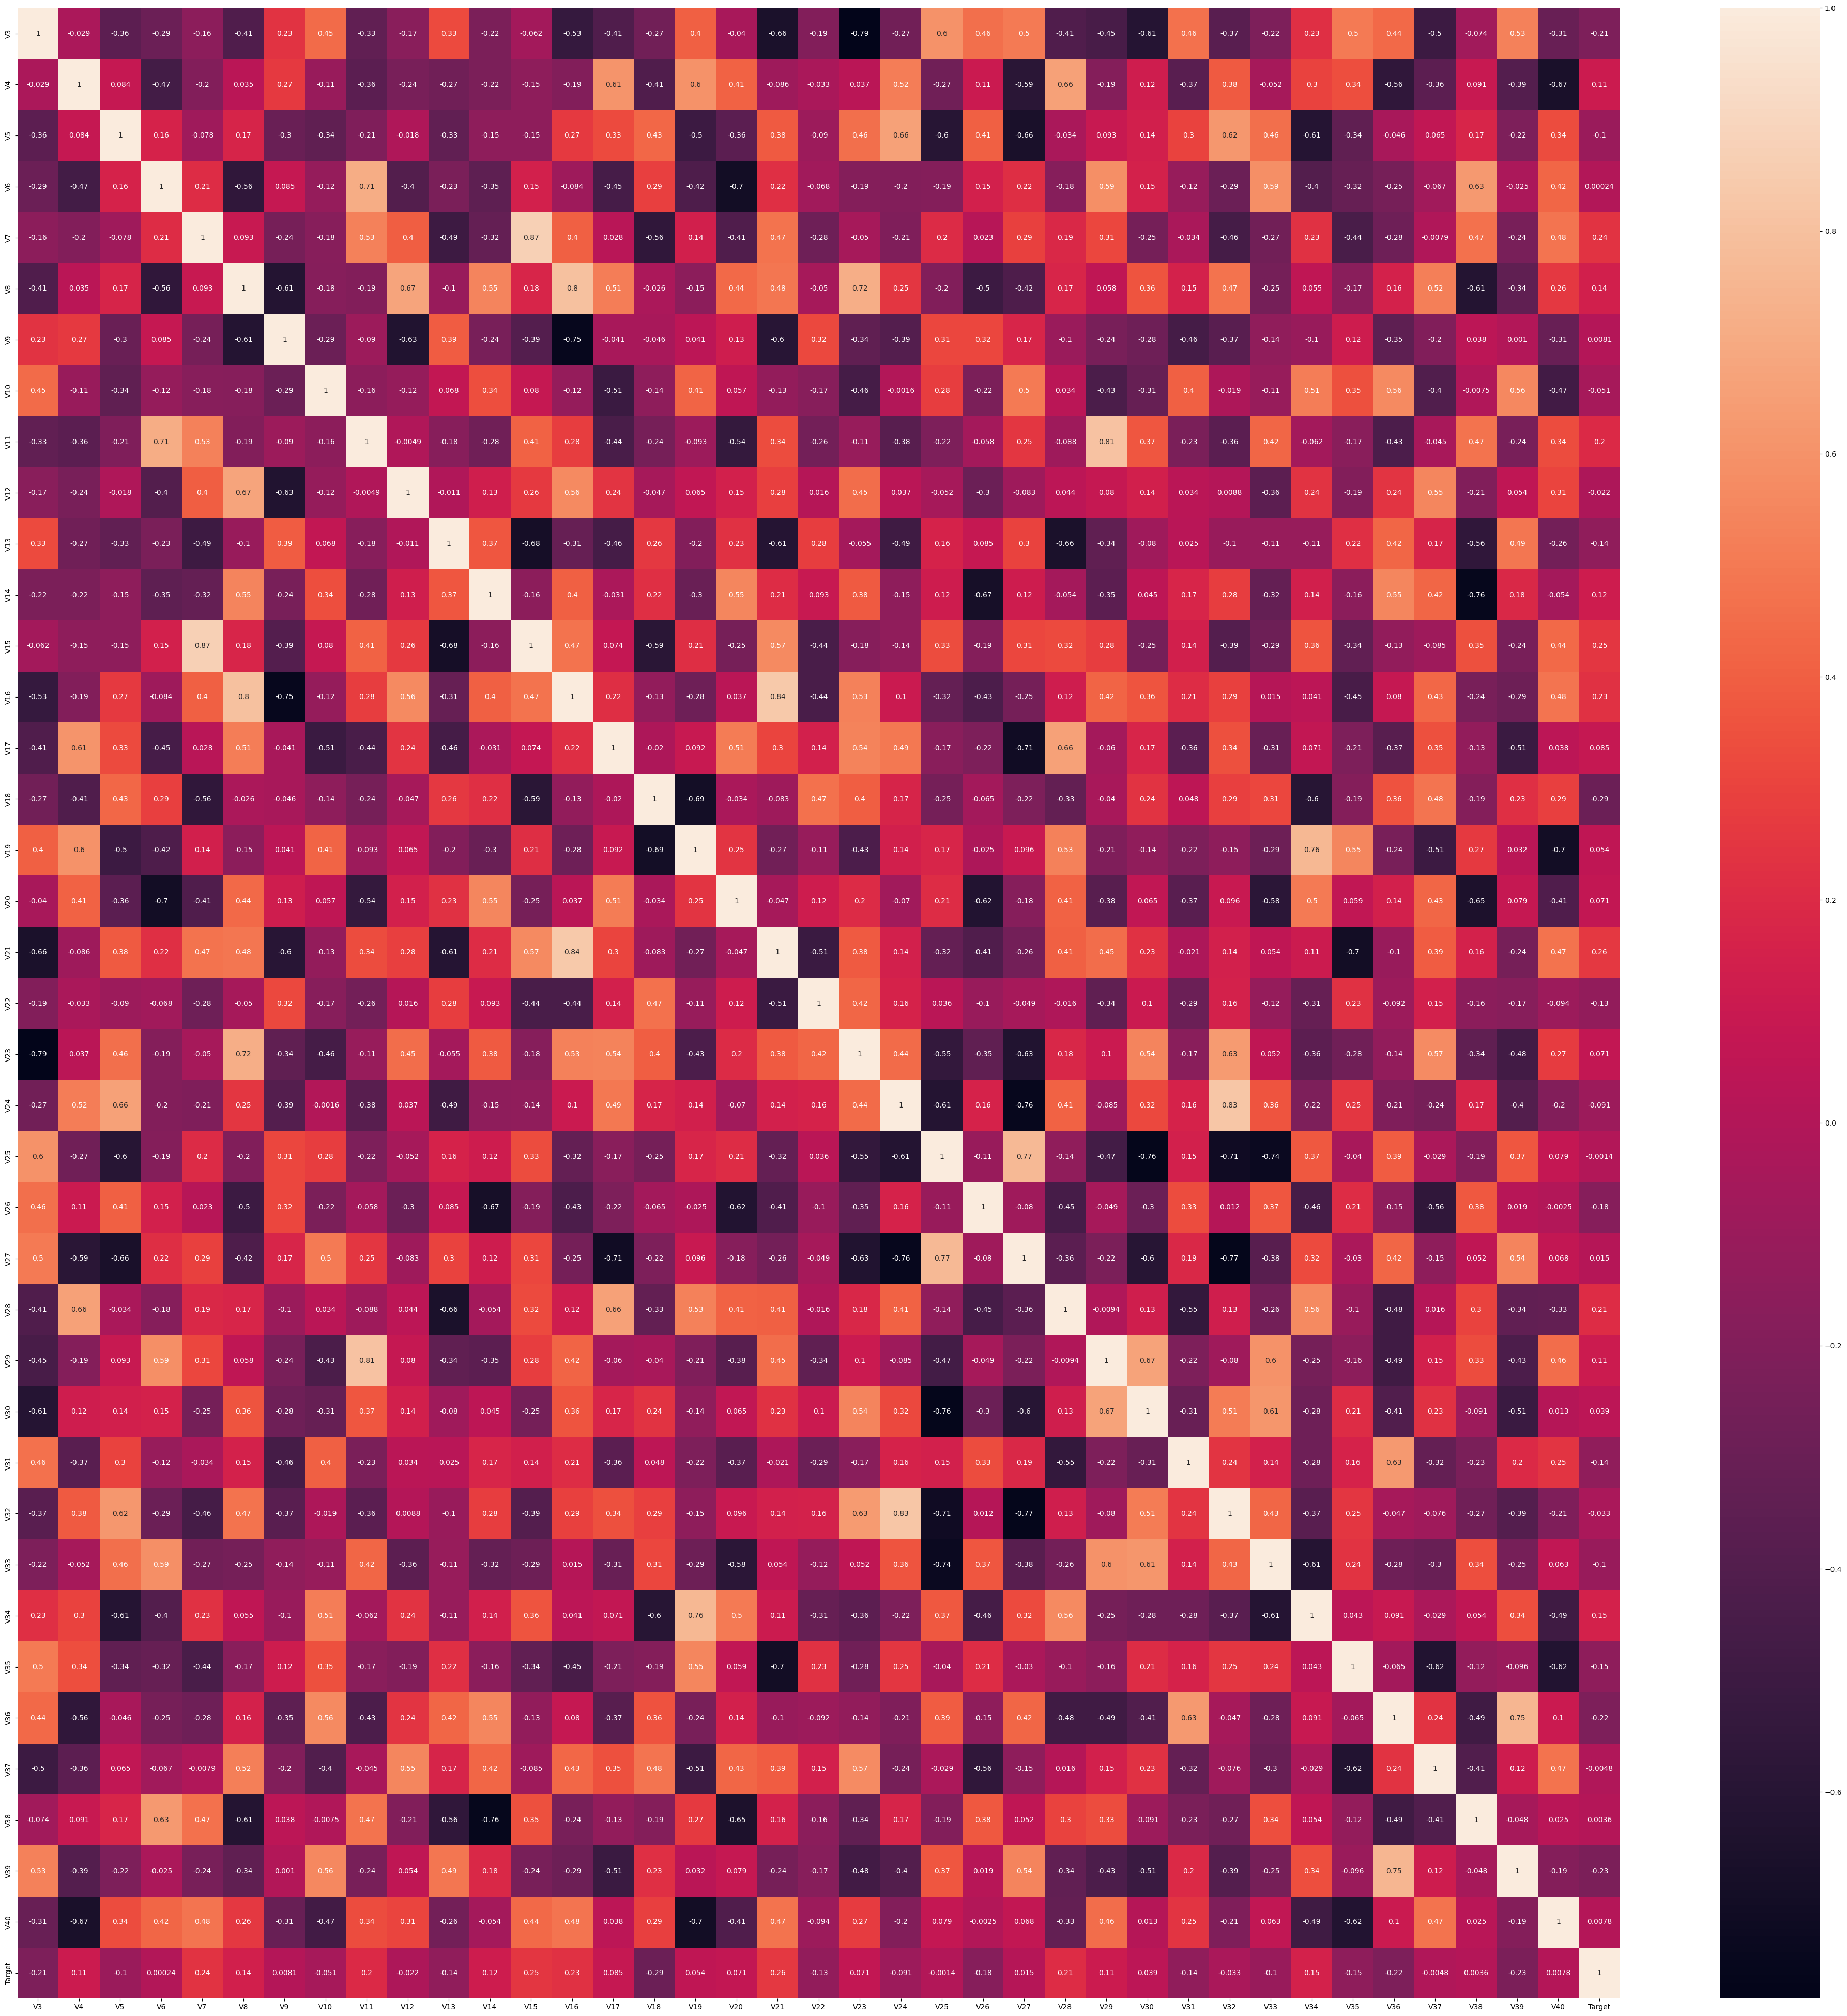

In [11]:
corr = df.corr()
plt.figure(figsize=(50,50))
sns.heatmap(corr, annot=True)

In [12]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [13]:
corr_feature=correlation(df,0.7)
len(set(corr_feature))

10

In [14]:
corr_feature

{'V11', 'V15', 'V16', 'V21', 'V23', 'V27', 'V29', 'V32', 'V34', 'V39'}

In [15]:
df.drop(['V11'], axis=1, inplace=True)

In [16]:
df.drop(['V15'], axis=1, inplace=True)

In [17]:
df.drop(['V16'], axis=1, inplace=True)

In [18]:
df.drop(['V21'], axis=1, inplace=True)

In [19]:
df.drop(['V23'], axis=1, inplace=True)

In [20]:
df.drop(['V27'], axis=1, inplace=True)

In [21]:
df.drop(['V29'], axis=1, inplace=True)

In [22]:
df.drop(['V32'], axis=1, inplace=True)

In [23]:
df.drop(['V34'], axis=1, inplace=True)

In [24]:
df.drop(['V39'], axis=1, inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V3      20000 non-null  float64
 1   V4      20000 non-null  float64
 2   V5      20000 non-null  float64
 3   V6      20000 non-null  float64
 4   V7      20000 non-null  float64
 5   V8      20000 non-null  float64
 6   V9      20000 non-null  float64
 7   V10     20000 non-null  float64
 8   V12     20000 non-null  float64
 9   V13     20000 non-null  float64
 10  V14     20000 non-null  float64
 11  V17     20000 non-null  float64
 12  V18     20000 non-null  float64
 13  V19     20000 non-null  float64
 14  V20     20000 non-null  float64
 15  V22     20000 non-null  float64
 16  V24     20000 non-null  float64
 17  V25     20000 non-null  float64
 18  V26     20000 non-null  float64
 19  V28     20000 non-null  float64
 20  V30     20000 non-null  float64
 21  V31     20000 non-null  float64
 22

In [26]:
X = df[['V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V12', 'V13', 'V14',
       'V17', 'V18', 'V19', 'V20', 'V22', 'V24', 'V25', 'V26', 'V28', 'V30',
       'V31', 'V33', 'V35', 'V36', 'V37', 'V38', 'V40']]
y= df['Target']

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [33]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold

In [34]:
params = {"alpha":np.arange(0.00001, 10, 500)}

# Number of Folds and adding the random state for replication
kf=KFold(n_splits=5,shuffle=True, random_state=42)

# Initializing the Model
lasso = Lasso()

# GridSearchCV with model, params and folds.
lasso_cv=GridSearchCV(lasso, param_grid=params, cv=kf)
lasso_cv.fit(X, y)
print("Best Params {}".format(lasso_cv.best_params_))

Best Params {'alpha': 1e-05}


In [35]:
names=df.drop("Target", axis=1).columns
print("Column Names: {}".format(names.values))

Column Names: ['V3' 'V4' 'V5' 'V6' 'V7' 'V8' 'V9' 'V10' 'V12' 'V13' 'V14' 'V17' 'V18'
 'V19' 'V20' 'V22' 'V24' 'V25' 'V26' 'V28' 'V30' 'V31' 'V33' 'V35' 'V36'
 'V37' 'V38' 'V40']


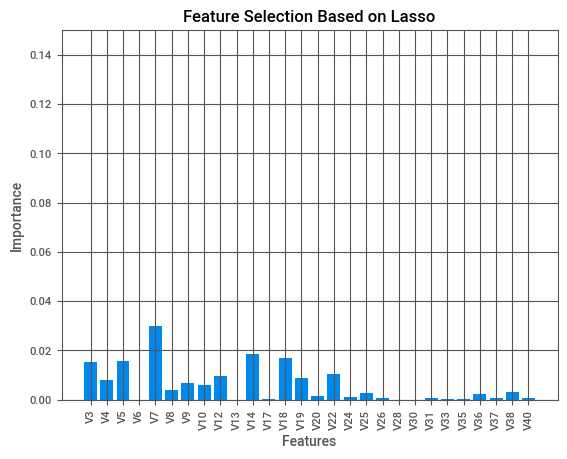

In [36]:
# calling the model with the best parameter
lasso1 = Lasso(alpha=0.00001)
lasso1.fit(X_train, y_train)

# Using np.abs() to make coefficients positive.  
lasso1_coef = np.abs(lasso1.coef_)

# plotting the Column Names and Importance of Columns. 
plt.bar(names, lasso1_coef)
plt.xticks(rotation=90)
plt.grid()
plt.title("Feature Selection Based on Lasso")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.ylim(0, 0.15)
plt.show()

In [37]:
# Subsetting the features which has more than 0.001 importance.
feature_subset=np.array(names)[lasso1_coef>0.001]
print("Selected Feature Columns: {}".format(feature_subset))

# Adding the target to the list of feaatures. 
feature_subset=np.append(feature_subset, "Target")
print("Selected Columns: {}".format(feature_subset))

Selected Feature Columns: ['V3' 'V4' 'V5' 'V7' 'V8' 'V9' 'V10' 'V12' 'V14' 'V18' 'V19' 'V20' 'V22'
 'V24' 'V25' 'V36' 'V38']
Selected Columns: ['V3' 'V4' 'V5' 'V7' 'V8' 'V9' 'V10' 'V12' 'V14' 'V18' 'V19' 'V20' 'V22'
 'V24' 'V25' 'V36' 'V38' 'Target']


In [38]:
df_new = df[feature_subset]
print(df_new.head())

         V3        V4        V5        V7        V8        V9       V10  \
0  3.101546  0.506130 -0.221083 -2.910870  0.050714 -1.522351  3.761892   
1  0.909671 -1.367528  0.332016  0.732600 -4.332135  0.565695 -0.101080   
2  0.634031 -2.418815 -1.773827 -2.098941 -3.173204 -2.081860  5.392621   
3  7.046143 -1.147285  0.083080  0.207309 -2.493629  0.344926  2.118578   
4 -3.758361 -2.982897  3.792714  0.205433  4.848994 -1.854920 -6.220023   

        V12       V14       V18       V19       V20       V22       V24  \
0  0.735893  1.417884  2.914097  2.269979  4.394876  0.646388  3.132986   
1 -0.951458 -2.706522  0.907716  0.756894 -5.833678  1.596647  1.766444   
2  1.106718  0.943301  3.688534  3.311196  1.059002  1.650120  1.679910   
3  0.459719 -0.636086 -1.281536  1.582104 -1.951778 -1.206011 -1.817653   
4  4.723757 -1.989432  3.734452 -6.312766 -5.379918  2.061694  4.489976   

        V25       V36       V38  Target  
0  0.665277  6.667486 -2.369169       0  
1 -0.267098 -2

In [39]:
df_new.columns

Index(['V3', 'V4', 'V5', 'V7', 'V8', 'V9', 'V10', 'V12', 'V14', 'V18', 'V19',
       'V20', 'V22', 'V24', 'V25', 'V36', 'V38', 'Target'],
      dtype='object')

In [41]:
!pip install xgboost


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
from xgboost import XGBRegressor

In [43]:
xgb = XGBRegressor()
xgb_model = xgb.fit(X_train,y_train)
xgb_model.score(X_test,y_test)

0.6908706303998391

In [45]:
rand_class = RandomForestRegressor()
model_rand_class = rand_class.fit(X_train,y_train)
model_rand_class.score(X_test,y_test)

0.7089231865910679

In [46]:
from sklearn.svm import SVC
model = SVC()

In [47]:
model.fit(X_train, y_train)

SVC()

In [48]:
model.score(X_test,y_test)

0.9893333333333333

In [50]:
from sklearn.linear_model import LogisticRegression


In [51]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [52]:
y_pred = log_reg.predict(X_test)

In [54]:
from sklearn.metrics import accuracy_score


In [55]:
accuracy = accuracy_score(y_test, y_pred)

In [56]:
log_reg.score(X_train,y_train)

0.9668571428571429

Things to Study
> train_test_split
> joblib?
> GridsearchCV
> RndomizedSearchCV
> MinMaxScalor
> How to check null values
> How to drop
> Matrix correlation code
> 